In [2]:
import pandas as pd
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [3]:
fn = './data/Cars93.csv'
cars = pd.read_csv(fn)

In [4]:
cars = cars.select_dtypes(include='number').dropna()

In [8]:
cars.head(3)

,Unnamed: 0,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
0,1,12.9,15.9,18.8,25,31,1.8,140,6300,2890,13.2,5,177,102,68,37,26.5,11.0,2705
1,2,29.2,33.9,38.7,18,25,3.2,200,5500,2335,18.0,5,195,115,71,38,30.0,15.0,3560
2,3,25.9,29.1,32.3,20,26,2.8,172,5500,2280,16.9,5,180,102,67,37,28.0,14.0,3375


In [9]:
cars.columns

Index(['Unnamed: 0', 'Min.Price', 'Price', 'Max.Price', 'MPG.city',
       'MPG.highway', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile',
       'Fuel.tank.capacity', 'Passengers', 'Length', 'Wheelbase', 'Width',
       'Turn.circle', 'Rear.seat.room', 'Luggage.room', 'Weight'],
      dtype='object')

In [5]:
X_train, X_test, y_train, y_test = train_test_split(cars.drop('Price', axis=1), 
                                                    cars['Price'], test_size=0.2, random_state=42)


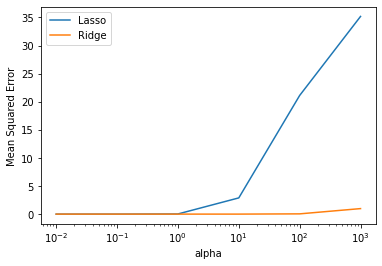

In [6]:
alphas = [0.01, 0.1, 1, 10, 100, 1000] # range of alpha values to try
lasso_scores = []
ridge_scores = []

for alpha in alphas:
    # fit Lasso model
    lasso = Lasso(alpha=alpha,)
    lasso.fit(X_train, y_train)
    lasso_scores.append(mean_squared_error(y_test, lasso.predict(X_test)))

    # fit Ridge model
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    ridge_scores.append(mean_squared_error(y_test, ridge.predict(X_test)))

# plot the results
plt.plot(alphas, lasso_scores, label='Lasso')
plt.plot(alphas, ridge_scores, label='Ridge')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()


In [7]:
best_alpha = alphas[ridge_scores.index(min(ridge_scores))]
ridge = Ridge(alpha=best_alpha)
ridge.fit(cars.drop('Price', axis=1), cars['Price'])


Ridge(alpha=1)